In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18
13,93,56,36,24.014976,82.056872,6.984354,185.277339,18
14,94,50,37,25.665852,80.663850,6.948020,209.586971,18
17,91,35,39,23.793920,80.418180,6.970860,206.261186,18
20,89,45,36,21.325042,80.474764,6.442475,185.497473,18


In [13]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.084996,0.343172,-0.022925,0.263791,0.091578,-0.021797,-0.175376
P,-0.084996,1.000000,-0.052944,-0.068690,-0.470329,-0.003966,-0.017827,-0.432252
K,0.343172,-0.052944,1.000000,-0.084430,0.059263,0.010826,-0.020435,0.002077
temperature,-0.022925,-0.068690,-0.084430,1.000000,0.247642,-0.030254,-0.093072,0.019966
humidity,0.263791,-0.470329,0.059263,0.247642,1.000000,0.138226,-0.030023,0.264084
ph,0.091578,-0.003966,0.010826,-0.030254,0.138226,1.000000,-0.152062,-0.097180
rainfall,-0.021797,-0.017827,-0.020435,-0.093072,-0.030023,-0.152062,1.000000,-0.135949
label,-0.175376,-0.432252,0.002077,0.019966,0.264084,-0.097180,-0.135949,1.000000


<Axes: >

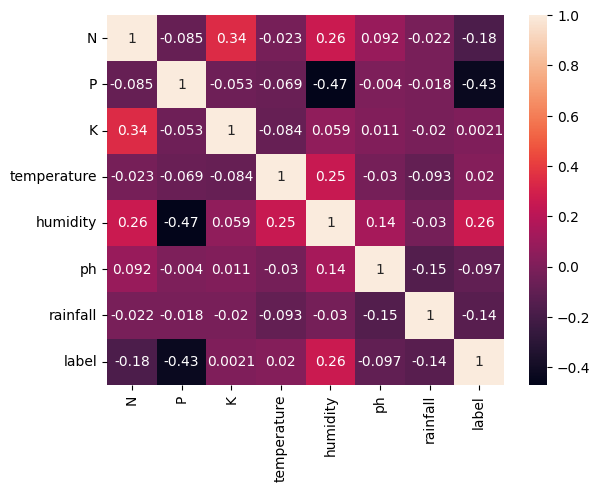

In [14]:
sns.heatmap(df.corr(),annot=True,cbar=True)

In [15]:
df.label.value_counts()

label
9     100
7     100
12    100
16    100
4     100
5     100
1     100
8     100
0     100
17    100
13    100
19    100
6     100
10     98
3      85
14     83
11     58
2      58
15     54
18     32
Name: count, dtype: int64

C:\Users\abhis\AppData\Local\Temp\ipykernel_1632\1814485217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'])


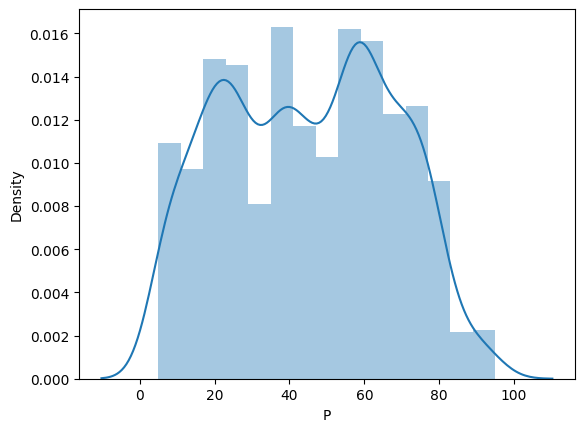

In [16]:
sns.distplot(df['P'])
plt.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_1632\4050618401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'])


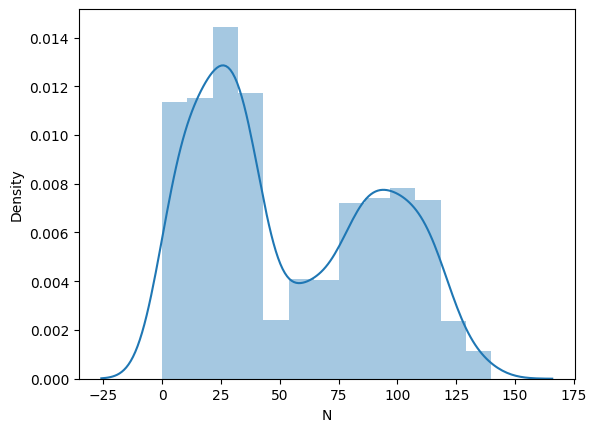

In [17]:
sns.distplot(df['N'])
plt.show()

In [18]:
#split
x=df.drop(columns=['label'])
y=df['label']

In [19]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473


In [20]:
y.head()

0     18
13    18
14    18
17    18
20    18
Name: label, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [24]:
x_train.shape

(1680, 7)

In [25]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  # fixed spelling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier  # fixed name
)


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
models={
    "LogisticRegression":LogisticRegression(),
    "GaussianNB":GaussianNB(),
    "SVC":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreeClassifier":ExtraTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    " AdaBoostClassifier": AdaBoostClassifier()
}

In [28]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f"{name} with accuracy score {score}")

LogisticRegression with accuracy score 0.963276836158192
GaussianNB with accuracy score 0.9887005649717514
SVC with accuracy score 0.9858757062146892
KNeighborsClassifier with accuracy score 0.9576271186440678
DecisionTreeClassifier with accuracy score 0.9774011299435028
ExtraTreeClassifier with accuracy score 0.8898305084745762
RandomForestClassifier with accuracy score 0.9887005649717514
BaggingClassifier with accuracy score 0.9915254237288136
GradientBoostingClassifier with accuracy score 0.9830508474576272
 AdaBoostClassifier with accuracy score 0.288135593220339


In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9858757062146892


In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9887005649717514


In [31]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [32]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Create a single input sample
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Apply the already fitted StandardScaler
    scaled_features = sc.transform(features)  # sc must be fitted during training
    
    # Predict
    prediction = gnb.predict(scaled_features)
    
    return prediction[0]


In [33]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18
13,93,56,36,24.014976,82.056872,6.984354,185.277339,18
14,94,50,37,25.665852,80.663850,6.948020,209.586971,18
17,91,35,39,23.793920,80.418180,6.970860,206.261186,18
20,89,45,36,21.325042,80.474764,6.442475,185.497473,18


In [34]:
N=90
P=42
K=43
temperature=20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536



In [35]:
predict=recommendation(N,P,K,temperature,humidity,ph,rainfall)

C:\Users\abhis\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
predict

np.int64(18)

In [37]:
print(le.classes_)

['banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton' 'jute'
 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon'
 'orange' 'papaya' 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']


In [38]:
print(le.classes_[3])


coconut


In [39]:
y_pred = model.predict(x_test)

# Check first 10 predictions
print("Predicted labels (encoded):", y_pred[:10])
print("Predicted crops:", le.inverse_transform(y_pred[:10]))
print("Actual crops:", le.inverse_transform(y_test[:10]))


Predicted labels (encoded): [10 10 10 10 12 17 12 10 12 13]
Predicted crops: ['mango' 'mango' 'mango' 'mango' 'mungbean' 'pomegranate' 'mungbean'
 'mango' 'mungbean' 'muskmelon']
Actual crops: ['mango' 'kidneybeans' 'mothbeans' 'mango' 'mungbean' 'coconut'
 'watermelon' 'pigeonpeas' 'watermelon' 'muskmelon']


In [40]:
import pickle

# Save model
pickle.dump(rf, open('model.pkl', 'wb'))

# Save StandardScaler
pickle.dump(sc, open('standscaler.pkl', 'wb'))

print("Model and StandardScaler saved successfully!")


Model and StandardScaler saved successfully!


In [41]:
import pickle

# Load model
model = pickle.load(open('model.pkl', 'rb'))

# Load StandardScaler
scaler = pickle.load(open('standscaler.pkl', 'rb'))

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!
